In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame(pd.read_csv("data.csv", encoding='latin1'))

In [5]:
dates = df['InvoiceDate'].tolist()
for i in range(len(dates)):
    parts = dates[i].split(' ')[0].split('/')
    dates[i] = int(parts[0]) * (int(parts[2]) % 2) + 1
df['InvoiceDate'] = dates
print(df.tail())

       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

        InvoiceDate  UnitPrice  CustomerID Country  
541904           13       0.85     12680.0  France  
541905           13       2.10     12680.0  France  
541906           13       4.15     12680.0  France  
541907           13       4.15     12680.0  France  
541908           13       4.95     12680.0  France  


In [6]:

udf =df.groupby('StockCode')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
udf.head()


,StockCode,Quantity
1147,22197,56450
2997,84077,53847
3515,85099B,47363
3536,85123A,38830
3305,84879,36221


In [7]:
df['Weight'] = df['Quantity'] * df['InvoiceDate'] / 13
wdf =df.groupby('StockCode')['Weight'].sum().reset_index().sort_values('Weight',ascending=False)
wdf.head()

,StockCode,Weight
1147,22197,37439.153846
2997,84077,28529.384615
3515,85099B,26956.153846
1982,23084,26418.615385
3305,84879,21316.769231


In [8]:
import matplotlib.pyplot as plt

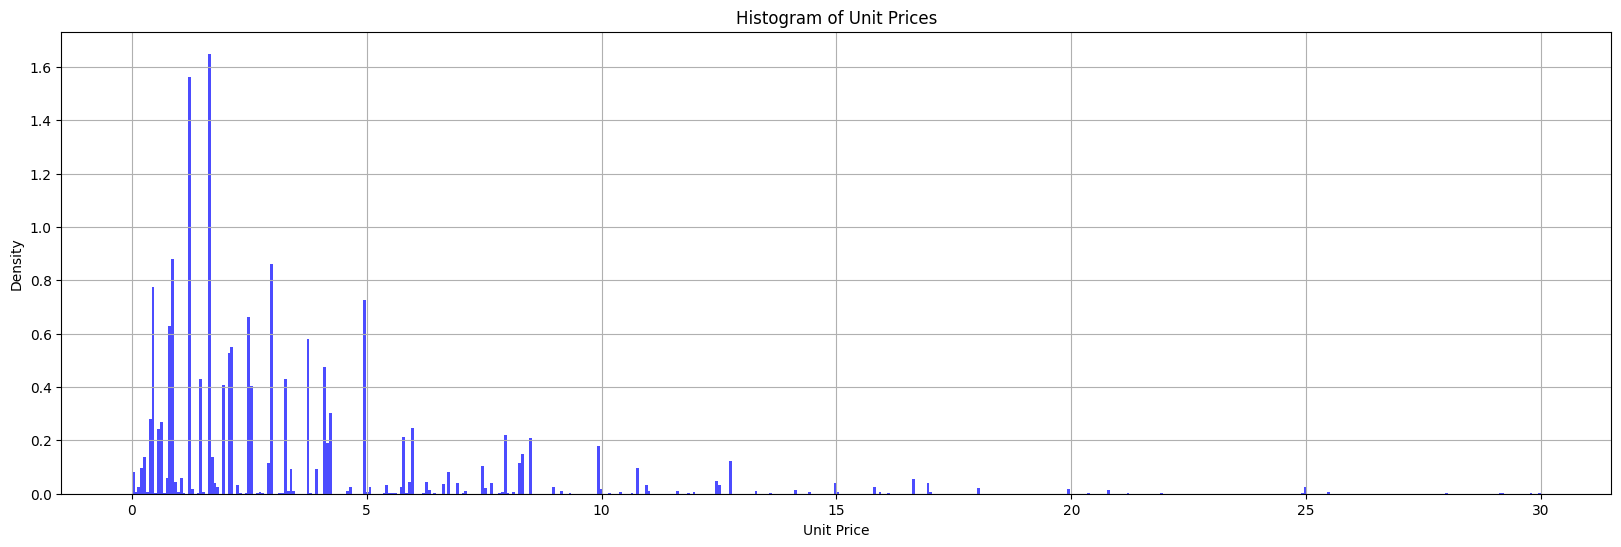

In [ ]:
# plots the UnitPrice graph to demonstrate the frequency distrubition of data #
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
# bins are interval number and range can be adjusted if you want to see up to 50 or 100 # 
plt.hist(df['UnitPrice'], bins=500, alpha=0.7, color='blue', density=True, range=(0, 30))  # Adjust number of bins as needed
plt.title('Histogram of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

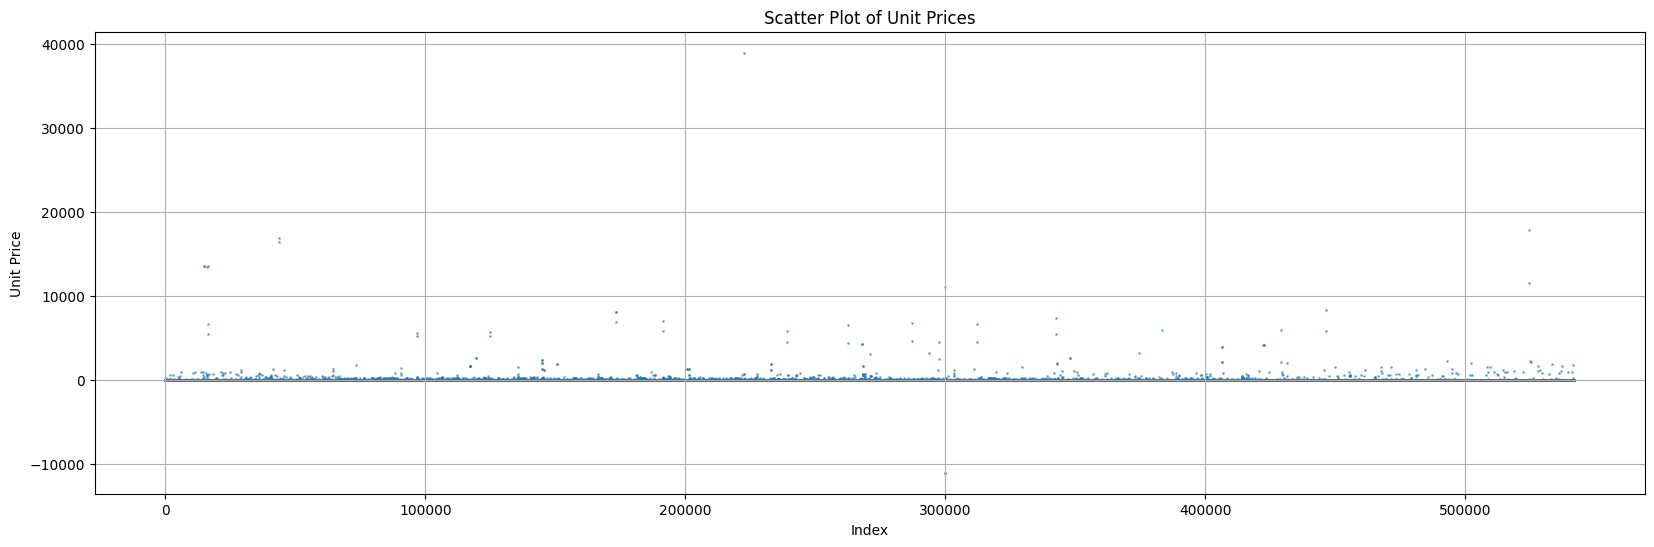

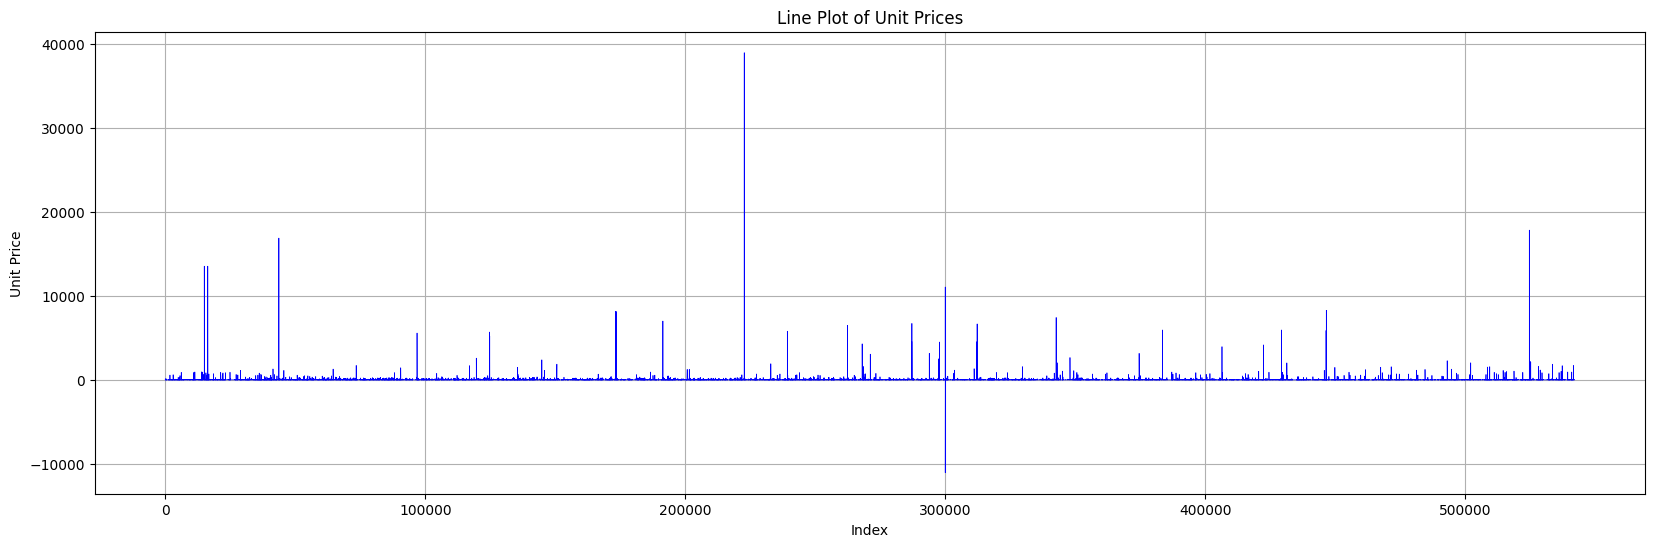

In [ ]:
unit_prices = df['UnitPrice']

# Create a scatter plot
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
plt.scatter(range(len(unit_prices)), unit_prices, s=1, alpha=0.5)  # Plotting against index for x-axis
plt.title('Scatter Plot of Unit Prices')
plt.xlabel('Index')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()

# Create a line plot
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
plt.plot(range(len(unit_prices)), unit_prices, color='blue', linewidth=0.5)  # Plotting against index for x-axis
plt.title('Line Plot of Unit Prices')
plt.xlabel('Index')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()

In [9]:
print(df[df['Quantity'] < 0])

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

        InvoiceDate  UnitPrice  CustomerID         Country     Weight  
141               1      27.50     1452

In [10]:
from rake_nltk import Rake
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EYLUL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EYLUL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import re

def delete_numbers(text):
    # Deletes numbers from the text
    pattern = r'\b\d+\b'
    if isinstance(text, str):
        text = re.sub(pattern, '', text)
    return text


Kelimeleri ayırp array halinde dataframe e yazıyor(sayıları silip öyle işlem yapıyor üstteki func kullanarak) 5dk sürdü bende ama değişir, haliyle uzun sürüyor

In [14]:
# buğradan çalntı func #

df["key_words"] = "" 
for index, row in df.iterrows():
    name = row["Description"]
    r = Rake()
    if isinstance(name, str):
        r.extract_keywords_from_text(delete_numbers(name))
        key_words_dict_scores = r.get_word_degrees()
        df.at[index, "key_words"] = list(key_words_dict_scores.keys())
print(df.head())      

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   InvoiceDate  UnitPrice  CustomerID         Country    Weight  \
0            1       2.55     17850.0  United Kingdom  0.461538   
1            1       3.39     17850.0  United Kingdom  0.461538   
2            1       2.75     17850.0  United Kingdom  0.615385   
3            1       3.39     17850.0  United Kingdom  0.461538   
4            1       3.39     17850.0  United Kingdom  0.461538   

                                    key_words  
0      [white, hanging, heart, light, holder]  
1                     [white, metal, lantern]  
2        [cream, cup

In [15]:
#Flatten the list of lists into a single list of words
all_words = [word for sublist in df["key_words"].tolist() for word in sublist]

# Count the frequency of each word
word_freq = {}
for word in all_words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Convert the dictionary to a DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=["Word", "Frequency"])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by="Frequency", ascending=False)


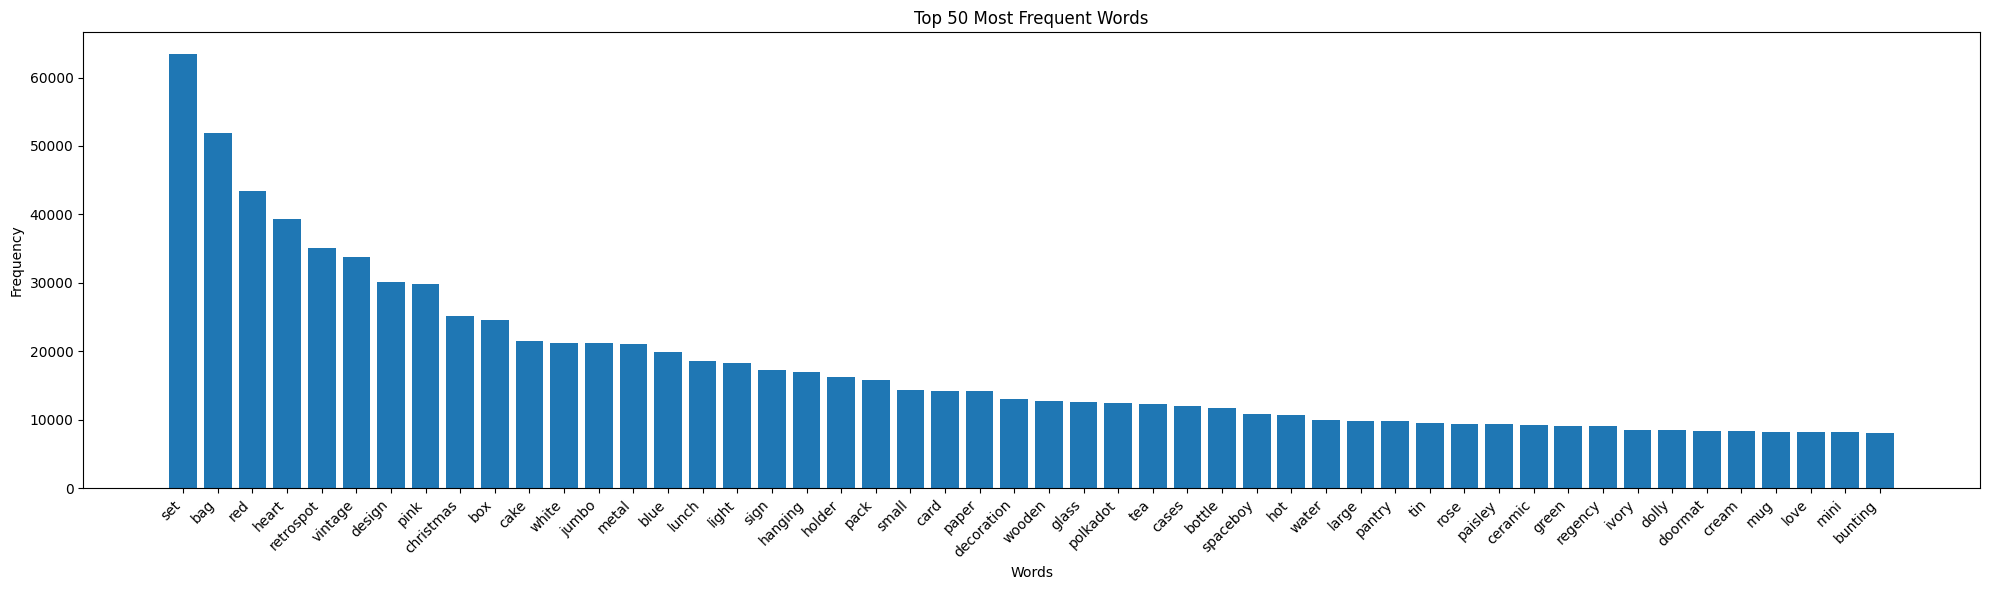

In [18]:

# Plotting
plt.figure(figsize=(20, 6))
plt.bar(word_freq_df["Word"][:50], word_freq_df["Frequency"][:50])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 50 Most Frequent Words")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()